In [ ]:
#conda install git

In [ ]:
#!git clone https://github.com/advimman/lama.git

In [1]:
!pip install -r requirements.txt --quiet
!pip install wget --quiet

  Using cached easydict-1.9.tar.gz (6.4 kB)
  Preparing metadata (setup.py) ... done
  Using cached tensorflow-2.13.0-cp310-cp310-macosx_12_0_arm64.whl (1.9 kB)
  Using cached albumentations-0.5.2-py3-none-any.whl (72 kB)
  Using cached hydra_core-1.1.0-py3-none-any.whl (144 kB)
  Using cached pytorch_lightning-1.2.9-py3-none-any.whl (841 kB)
  Using cached kornia-0.5.0-py2.py3-none-any.whl (271 kB)
  Using cached webdataset-0.2.48-py3-none-any.whl (51 kB)
  Using cached wldhx.yadisk_direct-0.0.6-py3-none-any.whl (4.5 kB)
  Using cached omegaconf-2.1.2-py3-none-any.whl (74 kB)
  Using cached antlr4-python3-runtime-4.8.tar.gz (112 kB)
  Preparing metadata (setup.py) ... done
  Using cached torchmetrics-0.2.0-py3-none-any.whl (176 kB)
  Using cached tensorflow_macos-2.13.0-cp310-cp310-macosx_12_0_arm64.whl (189.3 MB)
  Using cached astunparse-1.6.3-py2.py3-none-any.whl (12 kB)
  Using cached flatbuffers-23.5.26-py2.py3-none-any.whl (26 kB)
  Using cached gast-0.4.0-py3-none-any.whl (9.8 

In [ ]:
print('\n> Download the model')
#!curl -L $(yadisk-direct https://disk.yandex.ru/d/ouP6l8VJ0HpMZg) -o big-lama.zip
!unzip big-lama.zip

In [3]:
import os
cwd = os.getcwd()
cwd

'/Users/pragyanjagadev/PycharmProjects/unet-lightning/lama'

In [4]:
import base64, os
from IPython.display import HTML, Image
from base64 import b64decode
import matplotlib.pyplot as plt
import numpy as np
import wget
from shutil import copyfile
import shutil

In [39]:
#fname = cwd + '/with_points.png'
#mask_path = cwd + '/with_mask.png'
root = "."

print(os.path.join(cwd, '../dataset/'))

fname = '/Users/pragyanjagadev/PycharmProjects/unet-lightning/dataset/IAM/input/j01-042.png'
mask_path = '/Users/pragyanjagadev/PycharmProjects/unet-lightning/dataset/IAM/masks/j01-042.png'

image64 = base64.b64encode(open(fname, 'rb').read())
image64 = image64.decode('utf-8')

print(f'Will use {fname} for inpainting')
img = np.array(plt.imread(f'{fname}')[:,:,:3])
print(f'Will use {mask_path} for inpainting')
mask = np.array(plt.imread(f'{mask_path}')[:,:,:3])


#with_mask = np.array(plt.imread(mask)[:,:,:3])
#mask = (with_mask[:,:,0]==1)*(with_mask[:,:,1]==0)*(with_mask[:,:,2]==0)


/Users/pragyanjagadev/PycharmProjects/unet-lightning/lama/../dataset/
Will use /Users/pragyanjagadev/PycharmProjects/unet-lightning/dataset/IAM/input/j01-042.png for inpainting
Will use /Users/pragyanjagadev/PycharmProjects/unet-lightning/dataset/IAM/masks/j01-042.png for inpainting


IndexError: too many indices for array: array is 2-dimensional, but 3 were indexed

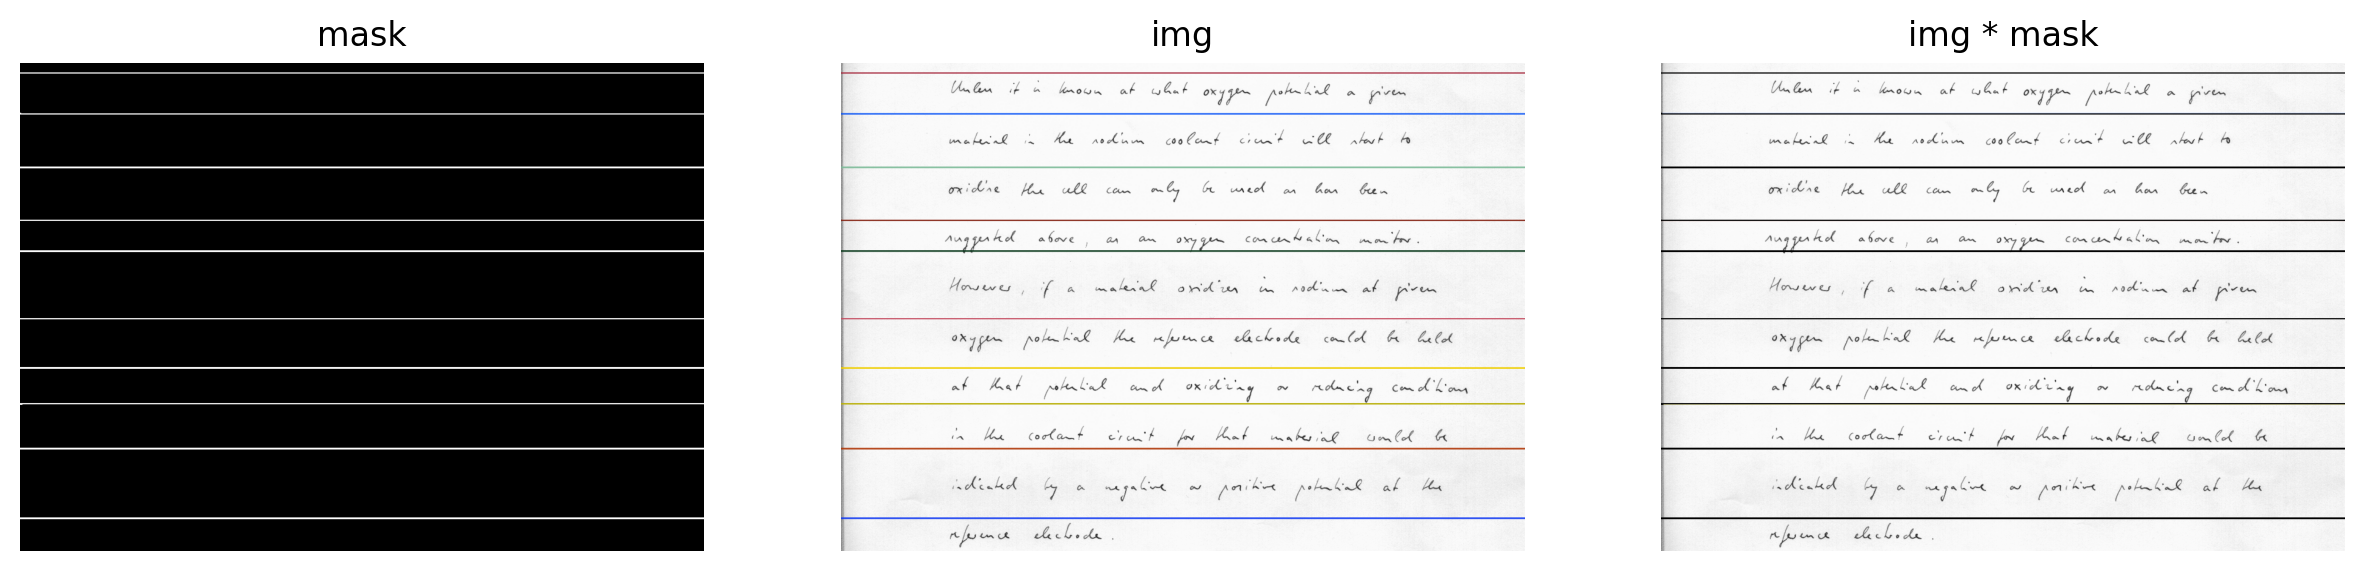

In [36]:

#@title Show a masked image and save a mask
import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = (15,5)
plt.rcParams['figure.dpi'] = 200
plt.subplot(131)

plt.imshow(mask, cmap='gray')
plt.axis('off')
plt.title('mask')
#plt.imsave("tesr_mask.png",mask, cmap='gray')

plt.subplot(132)
img = np.array(plt.imread(f'{fname}')[:,:,:3])
plt.imshow(img)
plt.axis('off')
plt.title('img')

plt.subplot(133)
img = np.array((1-mask.reshape(mask.shape[0], mask.shape[1], -1))*plt.imread(fname)[:,:,:3])
_=plt.imshow(img)
_=plt.axis('off')
_=plt.title('img * mask')
plt.show()


In [40]:
print('Run inpainting')
if '.jpeg' in fname:
    !PYTHONPATH=. TORCH_HOME=$(pwd) python3 bin/predict.py model.path=$(pwd)/big-lama indir=$(pwd)/data_for_prediction outdir=/content/output dataset.img_suffix=.jpeg > /dev/null
elif '.jpg' in fname:
    !PYTHONPATH=. TORCH_HOME=$(pwd) python3 bin/predict.py model.path=$(pwd)/big-lama indir=$(pwd)/data_for_prediction outdir=/content/output  dataset.img_suffix=.jpg > /dev/null
elif '.png' in fname:
    !PYTHONPATH=. TORCH_HOME=$(pwd) python3 bin/predict.py model.path=$(pwd)/big-lama indir=$(pwd)/data_for_prediction outdir=output  dataset.img_suffix=.png > /dev/null
else:
    print(f'Error: unknown suffix .{fname.split(".")[-1]} use [.png, .jpeg, .jpg]')


Run inpainting
/Users/pragyanjagadev/PycharmProjects/unet-lightning/dataset/IAM/input/j01-042.png


In [41]:

plt.rcParams['figure.dpi'] = 200
plt.imshow(plt.imread(f"output/_mask.png"))
_=plt.axis('off')
_=plt.title('inpainting result')
plt.show()

IndexError: list index out of range